In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data

In [2]:
df = pd.read_csv("runs.csv")
df.head(2)

,steps,energy,magnetization,beta,hot,model
0,0,584,-42,0.0,True,mod_0.0_True
1,1,584,42,0.0,True,mod_0.0_True


# Data processing

In [3]:
df["magnetization_abs"] = np.abs(df["magnetization"])
df["magnetization_abs"] = df["magnetization_abs"]/(100*100) # magnetization per atom
df["energy"] = df["energy"]/(100*100) # energy per atom
df.head(2)

,steps,energy,magnetization,beta,hot,model,magnetization_abs
0,0,0.0584,-42,0.0,True,mod_0.0_True,0.0042
1,1,0.0584,42,0.0,True,mod_0.0_True,0.0042


# Parameter evaluation

In [4]:
# betas in the study - use coolwarm colormap
betas = sorted(set(df.beta.value_counts().index))
normalize = plt.Normalize(min(betas), max(betas))
colormap = plt.cm.coolwarm

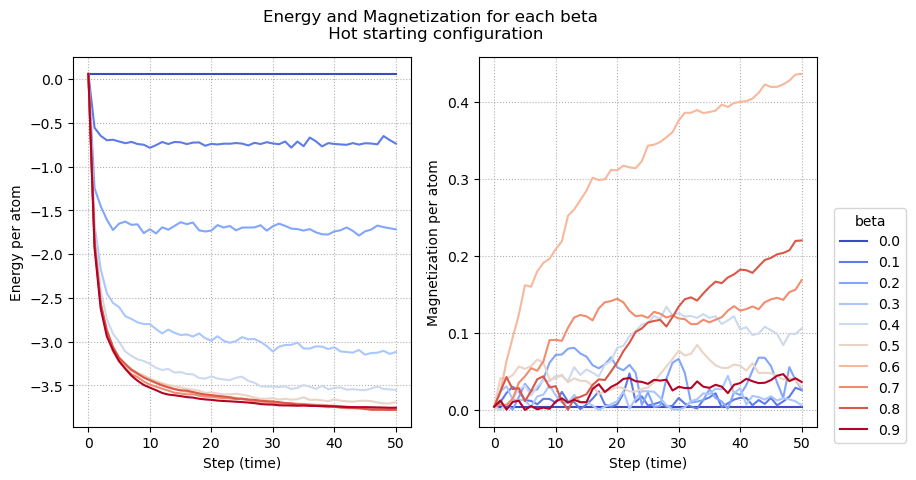

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(1.5*6.4, 4.8))

for beta in betas: # one line per temperature
    df_plot = df[df["beta"] == beta] 
    df_plot = df_plot[df_plot["hot"]] # filter hot starting states

    # sort accroding to simulation step (time)
    df_plot = df_plot.sort_values(by="steps", ascending=True)
    
    # color per beta 
    color = colormap(normalize(beta))
    
    ax1.plot(df_plot["steps"], df_plot["energy"], label=f'{beta:.1f}', color=color)
    ax2.plot(df_plot["steps"], df_plot["magnetization_abs"], label=f'{beta:.1f}', color=color)

# ax1.legend()

fig.suptitle("Energy and Magnetization for each beta \n Hot starting configuration")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.58), title="beta")


ax1.set_ylabel("Energy per atom")
ax2.set_ylabel("Magnetization per atom")

ax1.set_xlabel("Step (time)")
ax2.set_xlabel("Step (time)")

ax1.grid(ls=':')
ax2.grid(ls=':')

plt.show()

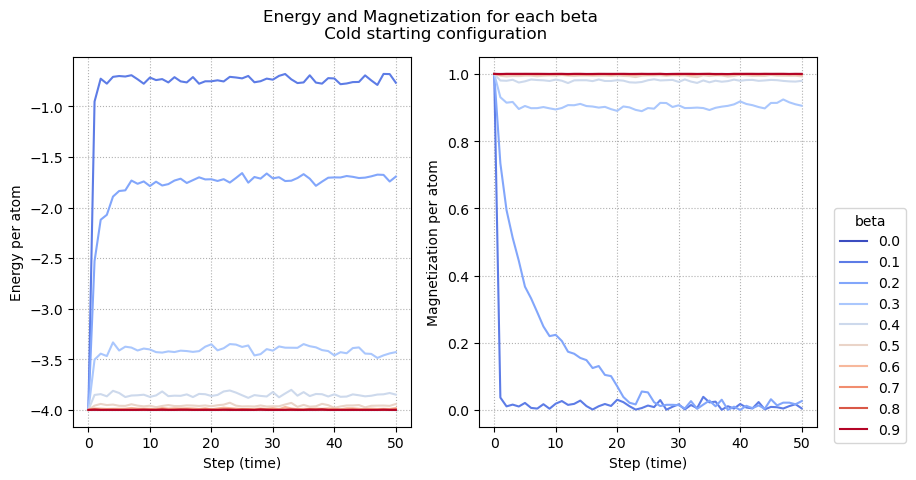

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(1.5*6.4, 4.8))

for beta in betas: # one line per temperature
    df_plot = df[df["beta"] == beta] 
    df_plot = df_plot[df_plot["hot"]==False] # filter hot starting states
    
    # sort accroding to simulation step (time)
    df_plot = df_plot.sort_values(by="steps", ascending=True)
    
    # color per beta 
    color = colormap(normalize(beta))
    
    ax1.plot(df_plot["steps"], df_plot["energy"], label=f'{beta:.1f}', color=color)
    ax2.plot(df_plot["steps"], df_plot["magnetization_abs"], label=f'{beta:.1f}', color=color)

# ax1.legend()

fig.suptitle("Energy and Magnetization for each beta \n Cold starting configuration")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.58), title="beta")


ax1.set_ylabel("Energy per atom")
ax2.set_ylabel("Magnetization per atom")

ax1.set_xlabel("Step (time)")
ax2.set_xlabel("Step (time)")

ax1.grid(ls=':')
ax2.grid(ls=':')

plt.show()

NameError: name 'colors' is not defined

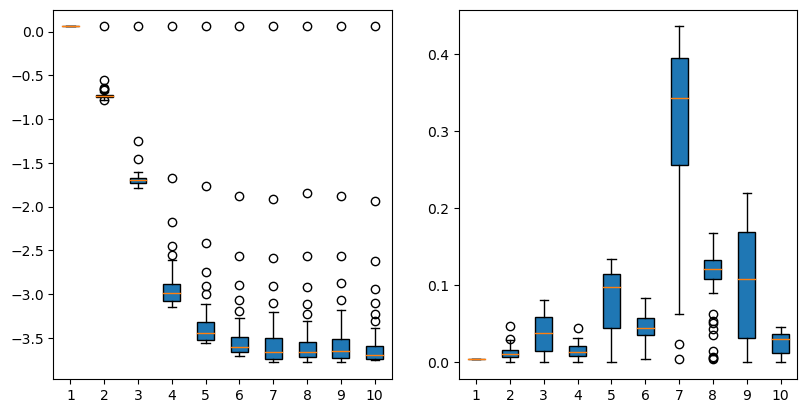

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(1.5*6.4, 4.8))

# aggregate for boxplots
energy_data = []
magnetization_data = []
for beta in betas:
    df_plot = df[(df["beta"] == beta) & (df["hot"])]  # filter beta and hot configuration
    
    energy_data.append(df_plot["energy"].tolist())
    magnetization_data.append(df_plot["magnetization_abs"].tolist())

# boxplots
bp1 = ax1.boxplot(energy_data, patch_artist=True)
bp2 = ax2.boxplot(magnetization_data, patch_artist=True)

# applying colors to the boxes
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)

# set titles, etc.
fig.suptitle("Boxplot of Energy and Magnetization \n Hot starting configuration")

ax1.set_title("Energy across beta")
ax2.set_title("Magnetization across beta")

ax1.set_xlabel("Beta")
ax2.set_xlabel("Beta")

ax1.set_ylabel("Energy per atom")
ax2.set_ylabel("Magnetization per atom")

# beta ticks
ax1.set_xticks(np.arange(1, len(betas) + 1))
ax1.set_xticklabels([f"{beta:.1f}" for beta in betas])
ax2.set_xticks(np.arange(1, len(betas) + 1))
ax2.set_xticklabels([f"{beta:.1f}" for beta in betas])

ax1.grid(ls=':')
ax2.grid(ls=':')

plt.tight_layout()
plt.show()


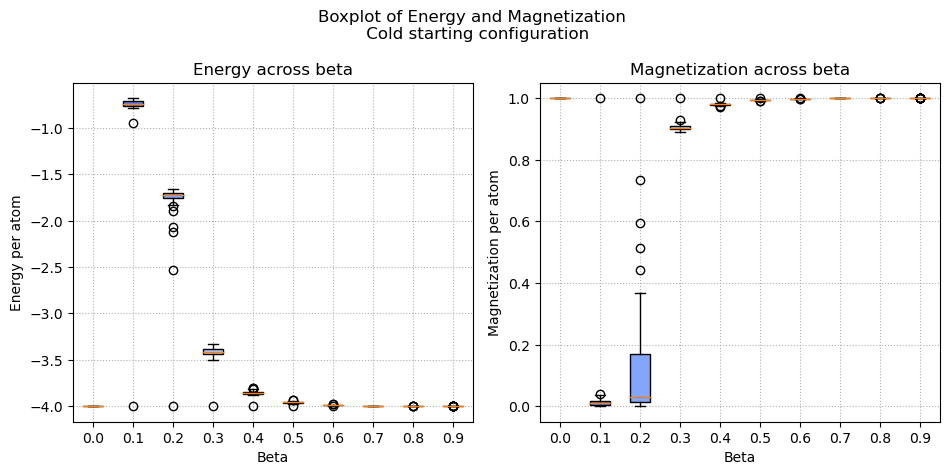

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(1.5*6.4, 4.8))

# aggregate for boxplots
energy_data = []
magnetization_data = []
for beta in betas:
    df_plot = df[(df["beta"] == beta) & (df["hot"]==False)]  # filter beta and cold configuration
    
    energy_data.append(df_plot["energy"].tolist())
    magnetization_data.append(df_plot["magnetization_abs"].tolist())

# boxplots
bp1 = ax1.boxplot(energy_data, patch_artist=True)
bp2 = ax2.boxplot(magnetization_data, patch_artist=True)

# applying colors to the boxes
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)

# set titles, etc.
fig.suptitle("Boxplot of Energy and Magnetization \n Cold starting configuration")

ax1.set_title("Energy across beta")
ax2.set_title("Magnetization across beta")

ax1.set_xlabel("Beta")
ax2.set_xlabel("Beta")

ax1.set_ylabel("Energy per atom")
ax2.set_ylabel("Magnetization per atom")

# beta ticks
ax1.set_xticks(np.arange(1, len(betas) + 1))
ax1.set_xticklabels([f"{beta:.1f}" for beta in betas])
ax2.set_xticks(np.arange(1, len(betas) + 1))
ax2.set_xticklabels([f"{beta:.1f}" for beta in betas])

ax1.grid(ls=':')
ax2.grid(ls=':')

plt.tight_layout()
plt.show()
